# Yellow Taxi Analysis

Objective: https://gist.github.com/stuartlynn/706b5b71b8353b28bc6f3ac6937b1bc7

Data dictionary: http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

In [1]:
# Let's import some libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data and checking its shape
march = pd.read_csv('../data/03-march.csv')
march.shape

(10294628, 17)

In [3]:
june = pd.read_csv('../data/06-june.csv')
june.shape

(9656993, 17)

In [4]:
november = pd.read_csv('../data/11-november.csv')
november.shape

(9284803, 17)

In [5]:
# Merging three months historical data into one data frame
df = pd.concat([march,june,november])
df.reset_index(inplace=True, drop=True)
df.shape

(29236424, 17)

In [6]:
# Let's take a glance on the data
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-03-09 21:30:11,2017-03-09 21:44:20,1,4.06,1,N,148,48,1,14.0,0.5,0.5,3.06,0.0,0.3,18.36
1,2,2017-03-09 21:47:00,2017-03-09 21:58:01,1,2.73,1,N,48,107,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80
2,2,2017-03-09 22:01:08,2017-03-09 22:11:16,1,2.27,1,N,79,162,1,10.0,0.5,0.5,2.82,0.0,0.3,14.12
3,2,2017-03-09 22:16:05,2017-03-10 06:26:11,1,3.86,1,N,237,41,1,12.0,0.5,0.5,3.99,0.0,0.3,17.29
4,2,2017-03-31 06:31:53,2017-03-31 06:41:48,1,3.45,1,N,41,162,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30


In [7]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [8]:
# Pickup and dropoff times are strings, let's convert them to timestamps so we can later work with them.
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [9]:
# Converting categorical data into 'category'
df['VendorID'] = df['VendorID'].astype('category')
df['payment_type'] = df['payment_type'].astype('category')
df['RatecodeID'] = df['RatecodeID'].astype('category')
df['PULocationID'] = df['PULocationID'].astype('category')
df['DOLocationID'] = df['DOLocationID'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')

In [10]:
df.dtypes

VendorID                       category
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                     category
store_and_fwd_flag             category
PULocationID                   category
DOLocationID                   category
payment_type                   category
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [11]:
# Cool. No NAs to deal with.
df.isnull().any()

VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count          False
trip_distance            False
RatecodeID               False
store_and_fwd_flag       False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
dtype: bool

In [12]:
# Let's explore the data
df.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07
mean,1.617798e+00,2.919386e+00,1.310930e+01,3.339407e-01,4.973104e-01,1.874055e+00,3.290113e-01,2.996283e-01,1.644710e+01
std,1.260992e+00,4.476535e+00,1.472817e+02,4.615744e-01,7.081708e-02,2.645570e+00,1.968881e+00,1.408904e-02,1.475248e+02
min,0.000000e+00,0.000000e+00,-5.500000e+02,-5.371000e+01,-5.000000e-01,-1.120000e+02,-1.750000e+01,-3.000000e-01,-5.503000e+02
25%,1.000000e+00,9.700000e-01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,1.000000e+00,1.600000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,3.010000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01,1.780000e+01
max,1.920000e+02,9.496980e+03,6.304618e+05,6.980000e+01,1.400000e+02,4.500000e+02,1.018950e+03,1.000000e+00,6.304631e+05


# Gossiping data

## Maximums

We don't have NAs in our data but yet it seems there may be some missing or incorrect data. Checking the max values of each column we can see there are some things "strange". There is a trip with 192 passengers on it (some driver must have mistyped), a trip with 9496 miles, a trip whose fare is about 630k USD, a 450 USD tip (someone seems to be extremely generous). Let's take a look to these trips.

In [13]:
df[df['passenger_count']==192]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
28795318,2,2017-11-29 18:49:11,2017-11-29 18:55:47,192,1.07,1,N,158,68,1,6.5,1.0,0.5,1.24,0.0,0.3,9.54


9.54 USD for a 192 passenger trip seems like a mistyped data.

In [14]:
df[df['trip_distance']==np.max(df['trip_distance'])]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
15934665,2,2017-06-20 15:21:21,2017-06-22 11:19:32,1,9496.98,1,N,193,193,2,9999.99,0.0,0.0,0.0,0.0,0.0,9999.99


I am not sure, but it seems a malfunction of the meter or maybe a test. 

In [15]:
df[df['fare_amount']==np.max(df['fare_amount'])]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
16068048,1,2017-06-20 22:34:58,2017-06-20 22:39:16,1,0.8,1,N,141,141,2,630461.82,0.5,0.5,0.0,0.0,0.3,630463.12


This looks like another error. 630k for a five minute and 0.8 miles trip seems a bit overkill.

In [16]:
df[df['tip_amount']==np.max(df['tip_amount'])]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
21597347,2,2017-11-05 22:36:50,2017-11-05 22:47:14,1,2.16,1,N,211,234,1,9.5,0.5,0.5,450.0,0.0,0.3,460.8


A night to never forget for the driver. Quickest 450 USD made ever!

In [17]:
df[df['tolls_amount']==np.max(df['tolls_amount'])]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
28579549,1,2017-11-28 23:24:24,2017-11-29 00:09:00,1,6.2,1,N,246,112,3,26.5,0.5,0.5,0.0,1018.95,0.3,1046.75


More than 1000 USD paid in tolls. Seems weird.

## Minimums

In [18]:
df[df['passenger_count']==0].count()[0]

51760

There are 51760 trips with no passengers. As this field is typed by the drivers they should have forgotten.

In [19]:
df[df['trip_distance']==np.min(df['trip_distance'])].count()[0]

191490

There are 191490 trips which distance is zero.

In [20]:
df[df['fare_amount']==np.min(df['fare_amount'])].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
16589619,2,2017-06-22 12:56:16,2017-06-22 12:56:32,2,0.0,5,N,223,223,3,-550.0,0.0,0.0,0.0,0.0,-0.3,-550.3


For sure another error.

In [21]:
df[df['tip_amount']==np.min(df['tip_amount'])]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
25459411,2,2017-11-17 19:50:41,2017-11-17 19:59:13,1,0.94,1,N,170,113,3,-7.0,-1.0,-0.5,-112.0,0.0,-0.3,-120.8


A generous driver who tips 112 USD to his client.

In [22]:
df[df['tolls_amount']==np.min(df['tolls_amount'])]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
5955958,2,2017-03-18 05:54:33,2017-03-18 05:56:19,1,0.0,5,N,231,231,4,-150.0,0.0,0.0,0.0,-17.5,-0.3,-167.8


Negative tolls. The dream of a driver.

# Exploring the data

All the examples we have checked on the previous sections are indeed outliers. They may have different sources (errors, generous clients, long trips...) but to us it does not matter. 

In [23]:
# Let's give some use to those timestamps and calculate the trip duration (in seconds) substracting the dropoff time to the pickup time.
df['delta_s_trip'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).astype('timedelta64[s]')

In [24]:
# We can calculate the speed of the taxi too
df['speed'] = df['trip_distance']/((df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).astype('timedelta64[s]')/3600)

In [25]:
# Tip as percentage
df['tip_pct'] = (df['tip_amount']/df['total_amount'])*100

In [26]:
# Dropping pickup and dropoff
df.drop(['tpep_dropoff_datetime','tpep_pickup_datetime'],axis=1,inplace=True)

In [27]:
# Removing outliers. Selecting numeric columns only.
filt_df = df.loc[:, [i for i in df.columns if i not in ['VendorID','payment_type','RatecodeID','PULocationID','DOLocationID','store_and_fwd_flag']]]

In [28]:
low = 0.05
high = 0.95
quant_df = filt_df.quantile([low,high])

In [29]:
# 0.05 quantiles an 0.95 quantiles for each variable.
quant_df

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,delta_s_trip,speed,tip_pct
0.05,1.0,0.49,4.5,0.0,0.5,0.00,0.00,0.3,5.80,178.0,4.148860,0.000000
0.95,5.0,10.77,37.0,1.0,0.5,6.55,5.54,0.3,47.34,2307.0,22.895397,20.038536


In [30]:
# Filtering the outliers
# My machine runs out of memory when I run this, so either I switch to spark or I filter the outliers on each file
# filt_df = filt_df.apply(lambda x: x[(x>=quant_df.loc[low,x.name]) & 
#                                    (x<=quant_df.loc[high,x.name])], axis=0)


In [31]:
# I don't like to rewrite the same thing over and over again, so I'll write a function.
def data_cleanse(df):
    # Pickup and dropoff times are strings, let's convert them to timestamps so we can later work with them.
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
    # Converting categorical data into 'category'
    df['VendorID'] = df['VendorID'].astype('category')
    df['payment_type'] = df['payment_type'].astype('category')
    df['RatecodeID'] = df['RatecodeID'].astype('category')
    df['PULocationID'] = df['PULocationID'].astype('category')
    df['DOLocationID'] = df['DOLocationID'].astype('category')
    df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')
    # Let's give some use to those timestamps and calculate the trip duration (in seconds) substracting the dropoff time to the pickup time.
    df['delta_s_trip']=(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).astype('timedelta64[s]')
    df['speed'] = df['trip_distance']/((df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).astype('timedelta64[s]')/3600)
    df['tip_pct'] = (df['tip_amount']/df['total_amount'])*100
    # Dropping pickup and dropoff
    df.drop(['tpep_dropoff_datetime','tpep_pickup_datetime'],axis=1,inplace=True)
    # Removing outliers. Selecting numeric columns only.
    filt_df = df.loc[:, [i for i in df.columns if i not in ['VendorID','payment_type','RatecodeID','PULocationID','DOLocationID','store_and_fwd_flag']]]
    # Global variables... yikes!
    filt_df = filt_df.apply(lambda x: x[(x>=quant_df.loc[low,x.name]) & 
                                    (x<=quant_df.loc[high,x.name])], axis=0)
    # Recovering the categorical columns.
    filt_df = pd.concat([df.loc[:,['VendorID','payment_type','RatecodeID','PULocationID','DOLocationID','store_and_fwd_flag']], filt_df], axis=1)
    filt_df.dropna(inplace=True)
    return filt_df

In [32]:
# IT
filt_march = data_cleanse(march)

In [33]:
# DOES
filt_june = data_cleanse(june)

In [34]:
# WORK!
filt_november = data_cleanse(november)

In [35]:
# Cleaning the house
del df, march, june, november

In [36]:
# Joining the filtered dataframes
filt_df = pd.concat([filt_march,filt_june,filt_november])

In [37]:
# Reindexing and we finally have our filtered dataframe
filt_df.reset_index(inplace=True, drop=True)

In [38]:
filt_df.shape

(21138137, 18)

In [39]:
# Describing the filtered dataframe to check that the values are not strange
filt_df.describe()

,payment_type,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,delta_s_trip,speed,tip_pct
count,2.113814e+07,2.113814e+07,2.113814e+07,2.113814e+07,2.113814e+07,2.113814e+07,2.113814e+07,21138137.0,2.113814e+07,2.113814e+07,2.113814e+07,2.113814e+07,2.113814e+07,2.113814e+07,2.113814e+07
mean,1.330070e+00,1.642672e+02,1.618824e+02,1.492605e+00,2.124276e+00,1.063799e+01,3.325349e-01,0.5,1.406290e+00,8.709795e-03,3.000000e-01,1.318943e+01,7.654251e+02,1.014666e+01,9.983268e+00
std,4.839912e-01,6.769025e+01,7.059908e+01,1.023005e+00,1.537000e+00,5.128544e+00,3.720181e-01,0.0,1.349797e+00,2.180786e-01,1.137954e-10,5.897320e+00,4.340038e+02,3.828215e+00,7.840557e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.900000e-01,4.500000e+00,0.000000e+00,0.5,0.000000e+00,0.000000e+00,3.000000e-01,5.800000e+00,1.780000e+02,4.148860e+00,0.000000e+00
25%,1.000000e+00,1.130000e+02,1.070000e+02,1.000000e+00,1.090000e+00,7.000000e+00,0.000000e+00,0.5,0.000000e+00,0.000000e+00,3.000000e-01,8.800000e+00,4.310000e+02,7.258065e+00,0.000000e+00
50%,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.640000e+00,9.000000e+00,0.000000e+00,0.5,1.350000e+00,0.000000e+00,3.000000e-01,1.175000e+01,6.580000e+02,9.473684e+00,1.327434e+01
75%,2.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,2.620000e+00,1.300000e+01,5.000000e-01,0.5,2.160000e+00,0.000000e+00,3.000000e-01,1.596000e+01,1.000000e+03,1.232243e+01,1.666667e+01
max,4.000000e+00,2.650000e+02,2.650000e+02,5.000000e+00,1.077000e+01,3.700000e+01,1.000000e+00,0.5,6.550000e+00,5.540000e+00,3.000000e-01,4.734000e+01,2.307000e+03,2.289540e+01,2.003854e+01


In [40]:
numeric_features = [i for i in filt_df.columns if i not in ['VendorID','payment_type','RatecodeID','PULocationID','DOLocationID','store_and_fwd_flag']]

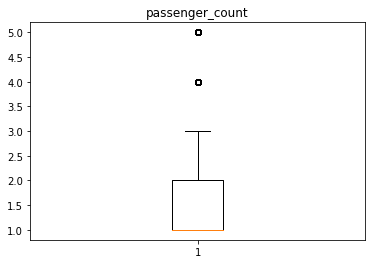

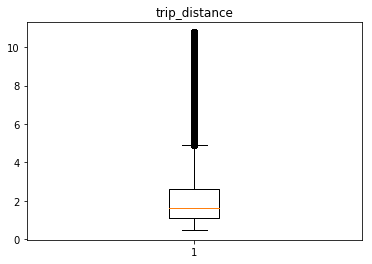

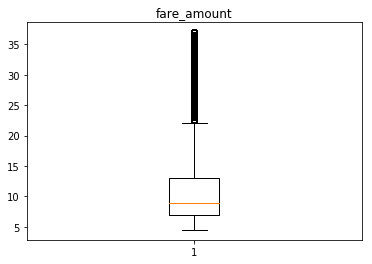

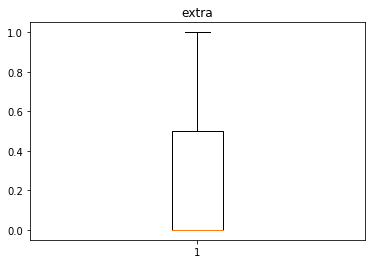

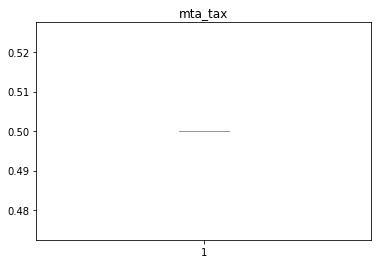

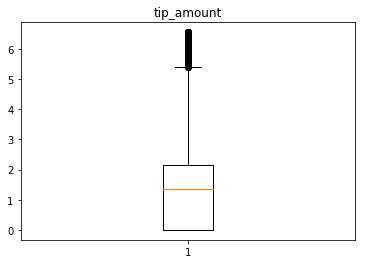

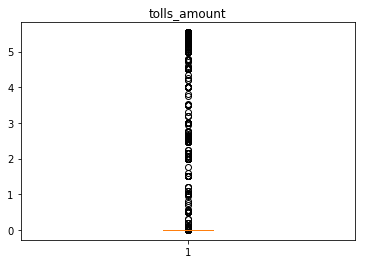

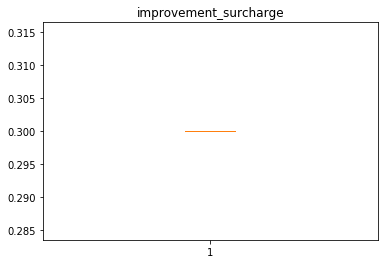

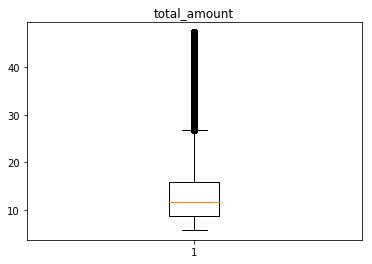

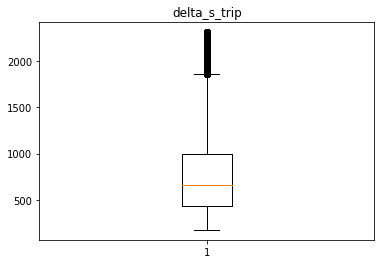

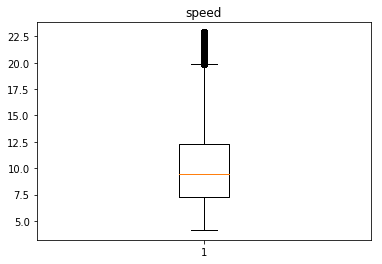

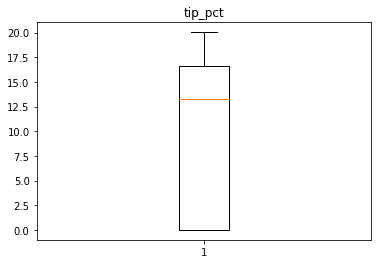

In [41]:
# Plotting numeric features distribution.
for i in numeric_features:
    plt.boxplot(filt_df[i])
    plt.title(i)
    plt.show()

In [42]:
# Dropping constant columns.
filt_df.drop(['mta_tax','improvement_surcharge'], axis = 1, inplace = True)

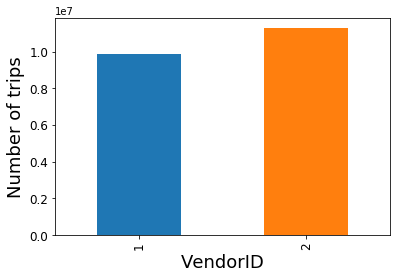

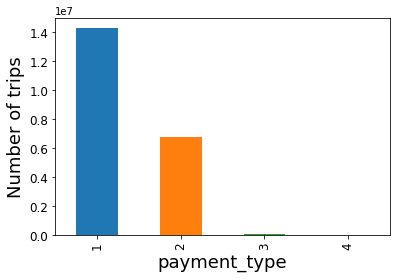

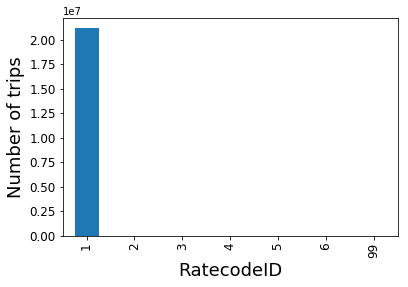

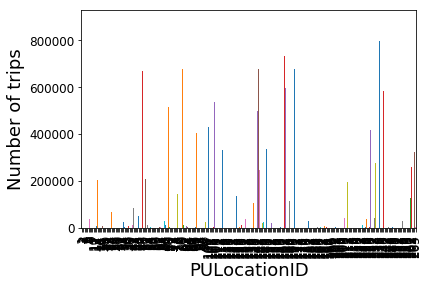

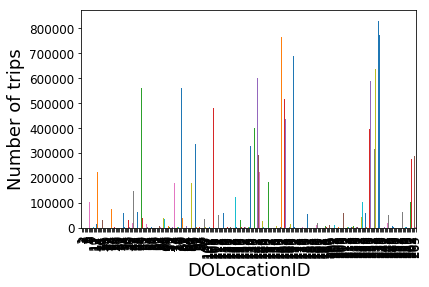

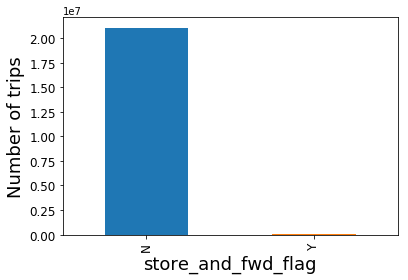

In [43]:
# Plotting categorical features percentages.
for i in ['VendorID','payment_type','RatecodeID','PULocationID','DOLocationID','store_and_fwd_flag']:
    ax = filt_df.groupby(i).size().plot(kind='bar')
    ax.set_xlabel(i, fontsize=18)
    ax.set_ylabel('Number of trips', fontsize=18)
    ax.tick_params(labelsize=12)
    plt.show()

# Modeling a tip predictor

We are going to create a model to predict how much tip a customer should give to the driver. </br> 
Instead of trying to predict the raw amount of a tip, we have previously calculated the percentage of the total amount that is given as a tip. This way we will have a restrained result between [0-100] and less "volatile".

In [44]:
# Importing some libraries from sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [45]:
# We have some categorical data, so we have to encode them again so sklearn can use them.
le = preprocessing.LabelEncoder()

In [46]:
for i in ['VendorID','payment_type','RatecodeID','PULocationID','DOLocationID','store_and_fwd_flag']:
    le.fit(filt_df[i])
    filt_df[i] = le.transform(filt_df[i]) 

In [47]:
# Let's create a dataframe without the target. We will remove also the tip_amount because it is a proxy for the tip_pct.
X = filt_df.drop(['tip_amount','tip_pct'], axis = 1)
y = filt_df['tip_pct']

In [48]:
# Splitting in train/test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
# Training a RF regressor with 150 trees.
regr = RandomForestRegressor(n_estimators = 150, n_jobs = -1)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=8,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [50]:
# Predicting the test data
y_pred = regr.predict(X_test)

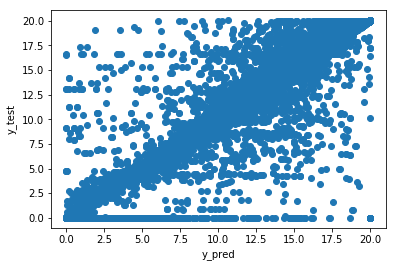

In [51]:
# We are going to plot the prediction vs the real target. If the prediction is good most of the data should be in the diagonal. (Absolute error)
plt.scatter(y_pred,y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [52]:
# It seems good, but let's check the R2 score 
r2_score(y_test, y_pred) 

0.9998349082403536

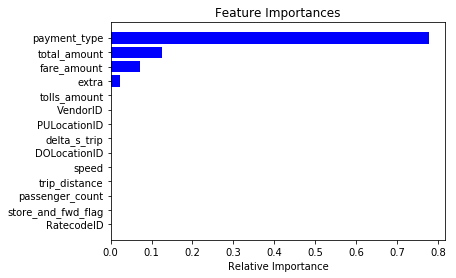

In [53]:
# Finally we are plotting the importance of the variables 
importances = regr.feature_importances_
indices = np.argsort(importances)
features = X_train.columns

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Final discussion

## Algorithm election 
</br> The problem is clearly a regression, we have to predict an a variable subject to the values of other independent variables. Among the algorithms that can perform a regression we have tree based algorithms (decision tree, random forest, gradient boosting...), SVM-R, neural networks... I chose random forest over the other algorithms because SVM-R and neural networks are black-box regressors (I could not explain why the predicted value is that) and I think that a decision tree is too simple and gradient boosting would be a bit overkill. </br>
We can see on the plot of the absolute error that most of the points sit on the diagonal. This indicates that the absolute error is reduced. Also, the regression gets a high R2 score, so we can say this a valid model. </br>
I think that the only caveat on implementing this model would be to keep the format of the inbound data, so the ETL we have made would not raise any exception. Also using this model on other cities would require some extra study. </br>
In order to improve this model, I would use some extra features like the coordinates of the pickup and the dropoff, so we could check if certain areas or neighborhoods are more likely to give bigger tips than others. </br>

## Turning the model into an API
</br> If we wanted to turn this model into an API I would create server with Flask and a response that receives the data to predict and returns the predicted value.

Javier Cano Montero